In [71]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle
import scipy

In [72]:
sig_c = 0.05      # bipolar receptive fied size ~ 1/5 of the actual size [mm]
tau1 = 0.04       # excitation time constant of the remporal filter [s]
tau2 = 0.0876     # rebound time constant [s]
bifw = 0.         # relative weight of rebound/excitation [1]
scale_mV = 20.    # UPDATED 

tauA = 0.15   # time constant of amacrine cells [s]
tauB = 0.08   # time constant of bipolar cells [s]
tauG = 0.01   # time contant of ganglion cells [s]

wAB = 10.     # synaptic weight from bipolar to amacrine [Hz]
wBA = -10.    # synaptic weight from amacrine to bipolar [Hz]
wGB = 4.0     # synaptic weight from bipolar to gangion  [Hz]  #UPDATED
wGA = 0.      # synaptic weight from amacrine  to gangion  [Hz]

slope = 5     # slope for ganglion cell recritifation [Hz/mV].   #UPDATED
threshold = 0 # threshold for ganglion cell recritifation [Hz/mV]

sig_pool = 0.065   # sigma for gaussian pooling in ganlion gells [mm]
spacing = 0.005    # spacing of cells on the lattice [mm]
delta = spacing 
N = 512             # number of neurons in each layer [1]
L =  N * delta      #300 * 0.005
idx = int(N/2)

b =  0.160          # half bar width [mm]
speed =  0.8        # speed [mm/s]
dt = 0.001          # integration time step [s]

In [73]:
# load data
name = f'bar_{speed}'
net = 'recurrent_nn'
signal = np.load(f'output/{net}/BC_grid_{name}.npy')
stim = np.load(f'output/{net}/stim_{name}.npy')

In [81]:

def compute_spatiotemporal_frequencies(signal, dt, delta):

    # # Perform a 2D Fourier Transform on the signal
    ft_signal = np.fft.fft2(signal)

    # # Shift the zero frequency component to the center
    ft_signal= np.fft.fftshift(ft_signal)

    # # Compute the magnitude (for visualization)
    # magnitude_spectrum = np.abs(ft_signal_shifted)
    
    # Get the frequency components along each dimension
    spatial_freqs =np.fft.fftshift(np.fft.fftfreq(signal.shape[0], d=dt))
    temporal_freqs = np.fft.fftshift(np.fft.fftfreq(signal.shape[1], d = delta))

    # return spatial_freqs, temporal_freqs, magnitude_spectrum
    return spatial_freqs, temporal_freqs, ft_signal




def ghat(omega,k, v, L, s2 = -1):
    return 1j * (np.exp((-1j * (omega-k*v*s2) * (L/v)) -1) /(omega-k*v*s2) )


# def extract_resonance_speed(magnitudes): 
#     N,tps = magnitudes.shape
#     max_idx = magnitudes.argmax()
#     spacemax = max_idx // tps
#     timemax = max_idx % tps
#     return (spacemax*0.005)/(timemax*0.001) #mm/s


In [82]:
signal = signal - signal.mean(axis = 0)
N, T = signal.shape
N, T

(512, 3199)

Text(0.0, 1.0, '$V_{B}$')

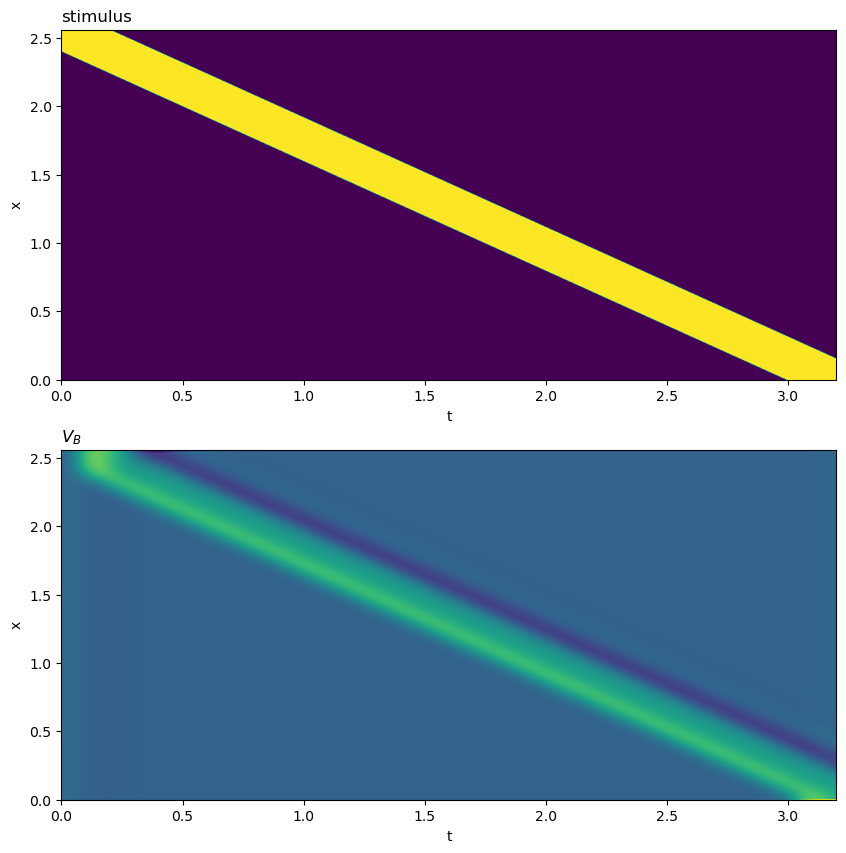

In [83]:
fig = plt.figure(figsize = (10,10))
gs = fig.add_gridspec(2,1)

ax = fig.add_subplot(gs[0,0])
ax.imshow(stim,extent=(0, T*dt, 0, L), aspect='auto')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_title('stimulus', loc = 'left')

ax = fig.add_subplot(gs[1,0])
ax.imshow(signal,extent=(0, T*dt, 0, L), aspect='auto')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_title(r'$V_{B}$', loc = 'left')


In [96]:

# spatial_freqs, temporal_freqs, magnitude_spectrum = compute_spatiotemporal_frequencies(signal, dt = dt, delta = delta)
ks,omegas,fts = compute_spatiotemporal_frequencies(signal, dt = dt, delta = delta)

omega_range = np.arange(-T/2, T/2, 1)
krange_range = np.arange(-N/2, N/2, 1)

t, x = np.meshgrid(omega_range, krange_range)
# t = 1/(t/dt)
# x = 1/(x/spacing)
ghat_mat  =ghat(t,x,speed,L)
df = fts/ghat_mat

(512, -500.0, 498.046875)

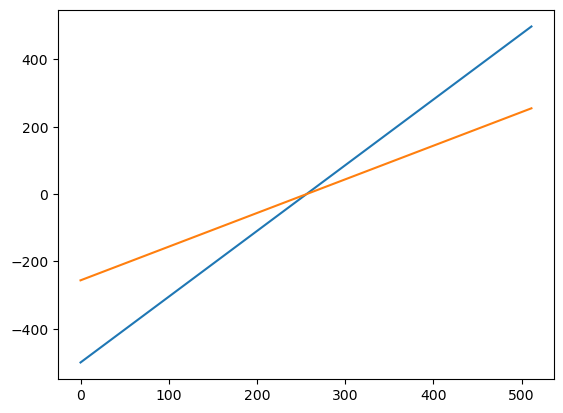

In [99]:
plt.plot(ks)
plt.plot(krange_range)
len(ks),ks.min(),ks.max()


Text(0.5, 1.0, 'spectrum / g_hat')

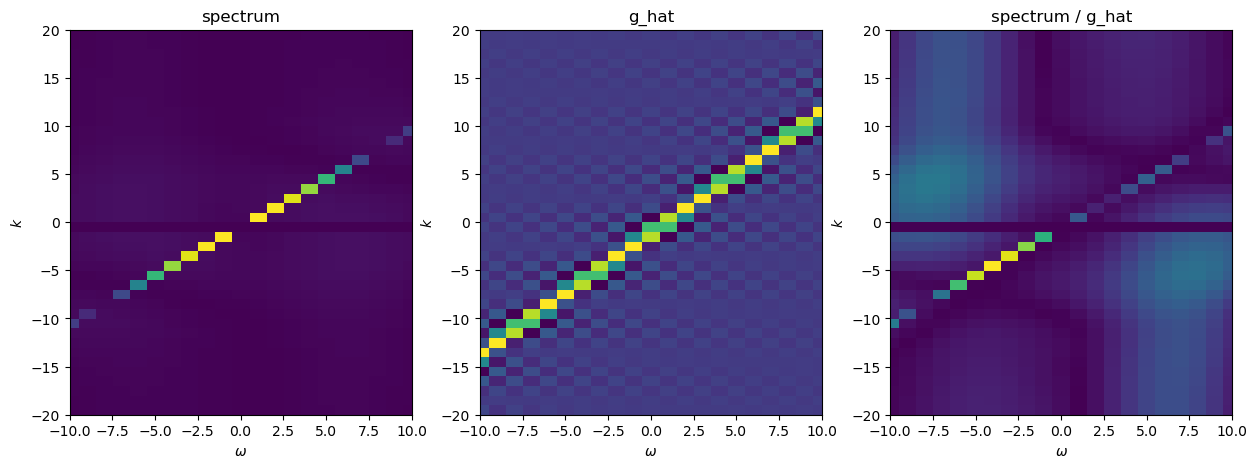

In [101]:
fig = plt.figure(figsize = (15,5))
gs = fig.add_gridspec(1,3)


ax = fig.add_subplot(gs[0,0])
ax.imshow(np.abs(fts),extent=(-T/2, T/2,-N/2,N/2), aspect='auto')
ax.set_xlim(-10,10)
ax.set_ylim(-20,20)

ax.set_xlabel(r'$\omega$')
ax.set_ylabel(r'$k$')

ax.set_title('spectrum')

ax = fig.add_subplot(gs[0,1])
ax.imshow(ghat_mat.real,extent=(-T/2, T/2,-N/2,N/2), aspect='auto')
ax.set_xlim(-10,10)
ax.set_ylim(-20,20)
# ax.set_xlim(-1500,0)
# ax.set_ylim(-256,-100)

ax.set_xlabel(r'$\omega$')
ax.set_ylabel(r'$k$')

ax.set_title('g_hat')


ax = fig.add_subplot(gs[0,2])
ax.imshow(np.abs(df),extent=(-T/2, T/2,-N/2,N/2), aspect='auto')
ax.set_xlim(-10,10)
ax.set_ylim(-20,20)

ax.set_xlabel(r'$\omega$')
ax.set_ylabel(r'$k$')

ax.set_title('spectrum / g_hat')
